In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1. Load the data

In [ ]:
train_image_dir = '../input/UBC-OCEAN/train_images'
test_image_dir = '../input/UBC-OCEAN/test_images'

In [ ]:
train_data = pd.read_csv('../input/UBC-OCEAN/train.csv')

In [ ]:
labels = ['CC', 'EC', 'HGSC', 'LGSC', 'MC']
train_data = train_data[train_data['label'].isin(labels)]

In [ ]:
train_data['full_path'] = train_data['image_id'].apply(lambda x: os.path.join(train_image_dir, str(x) + '.png'))
train_data

,image_id,label,image_width,image_height,is_tma,full_path
0,4,HGSC,23785,20008,False,../input/UBC-OCEAN/train_images/4.png
1,66,LGSC,48871,48195,False,../input/UBC-OCEAN/train_images/66.png
2,91,HGSC,3388,3388,True,../input/UBC-OCEAN/train_images/91.png
3,281,LGSC,42309,15545,False,../input/UBC-OCEAN/train_images/281.png
4,286,EC,37204,30020,False,../input/UBC-OCEAN/train_images/286.png
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,../input/UBC-OCEAN/train_images/65022.png
534,65094,MC,55042,45080,False,../input/UBC-OCEAN/train_images/65094.png
535,65300,HGSC,75860,27503,False,../input/UBC-OCEAN/train_images/65300.png
536,65371,HGSC,42551,41800,False,../input/UBC-OCEAN/train_images/65371.png


In [ ]:
thumbnails_folder_path = '../input/UBC-OCEAN/train_thumbnails'

train_files = [filename.split('.')[0] for filename in os.listdir(train_image_dir)]
thumbnails_files = [filename.replace('_thumbnail', '').split('.')[0] for filename in os.listdir(thumbnails_folder_path)]

In [ ]:
train_set = set(train_files)
thumbnails_set = set(thumbnails_files)

missing_image_ids = train_set - thumbnails_set
missing_image_ids_list = list(missing_image_ids)

print(f"Number of missing images: {len(missing_image_ids_list)}")
print("Image IDs in train_files but not in thumbnails_files:")
print(missing_image_ids_list)

Number of missing images: 25
Image IDs in train_files but not in thumbnails_files:
['13568', '48734', '36783', '37385', '50932', '36583', '29084', '40864', '35565', '61797', '57696', '21020', '9200', '41368', '8280', '91', '41586', '53655', '36302', '17637', '47035', '4134', '42857', '31594', '44603']


In [ ]:
missing_image_ids_list = [int(image_id) for image_id in missing_image_ids_list]
filtered_train_data = train_data[train_data['image_id'].isin(missing_image_ids_list)]

filtered_train_data

,image_id,label,image_width,image_height,is_tma,full_path
2,91,HGSC,3388,3388,True,../input/UBC-OCEAN/train_images/91.png
37,4134,MC,2964,2964,True,../input/UBC-OCEAN/train_images/4134.png
76,8280,HGSC,2964,2964,True,../input/UBC-OCEAN/train_images/8280.png
83,9200,MC,3388,3388,True,../input/UBC-OCEAN/train_images/9200.png
112,13568,LGSC,2964,2964,True,../input/UBC-OCEAN/train_images/13568.png
149,17637,HGSC,2964,2964,True,../input/UBC-OCEAN/train_images/17637.png
176,21020,MC,3388,3388,True,../input/UBC-OCEAN/train_images/21020.png
236,29084,LGSC,3388,3388,True,../input/UBC-OCEAN/train_images/29084.png
263,31594,EC,3388,3388,True,../input/UBC-OCEAN/train_images/31594.png
288,35565,MC,2964,2964,True,../input/UBC-OCEAN/train_images/35565.png


In [ ]:
# creating full path column for each image in the train_data dataframe

train_data['full_path'] = ''
for index, row in train_data.iterrows():
    image_id = row['image_id']
    if image_id in missing_image_ids_list:
        train_data.at[index, 'full_path'] = os.path.join(train_image_dir, str(image_id) + '.png')
    else:
        train_data.at[index, 'full_path'] = os.path.join(thumbnails_folder_path, str(image_id) + '_thumbnail.png')

train_data

,image_id,label,image_width,image_height,is_tma,full_path
0,4,HGSC,23785,20008,False,../input/UBC-OCEAN/train_thumbnails/4_thumbnai...
1,66,LGSC,48871,48195,False,../input/UBC-OCEAN/train_thumbnails/66_thumbna...
2,91,HGSC,3388,3388,True,../input/UBC-OCEAN/train_images/91.png
3,281,LGSC,42309,15545,False,../input/UBC-OCEAN/train_thumbnails/281_thumbn...
4,286,EC,37204,30020,False,../input/UBC-OCEAN/train_thumbnails/286_thumbn...
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,../input/UBC-OCEAN/train_thumbnails/65022_thum...
534,65094,MC,55042,45080,False,../input/UBC-OCEAN/train_thumbnails/65094_thum...
535,65300,HGSC,75860,27503,False,../input/UBC-OCEAN/train_thumbnails/65300_thum...
536,65371,HGSC,42551,41800,False,../input/UBC-OCEAN/train_thumbnails/65371_thum...


In [ ]:
label_counts = train_data['label'].value_counts()
label_counts

label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64

# 2. Data Processing

In [ ]:
# Convert text to numeric
label_mapping = {'CC': 0, 'EC': 1, 'HGSC': 2, 'LGSC': 3, 'MC': 4}
train_data['label'] = train_data['label'].map(label_mapping)
train_data

,image_id,label,image_width,image_height,is_tma,full_path
0,4,2,23785,20008,False,../input/UBC-OCEAN/train_thumbnails/4_thumbnai...
1,66,3,48871,48195,False,../input/UBC-OCEAN/train_thumbnails/66_thumbna...
2,91,2,3388,3388,True,../input/UBC-OCEAN/train_images/91.png
3,281,3,42309,15545,False,../input/UBC-OCEAN/train_thumbnails/281_thumbn...
4,286,1,37204,30020,False,../input/UBC-OCEAN/train_thumbnails/286_thumbn...
...,...,...,...,...,...,...
533,65022,3,53355,46675,False,../input/UBC-OCEAN/train_thumbnails/65022_thum...
534,65094,4,55042,45080,False,../input/UBC-OCEAN/train_thumbnails/65094_thum...
535,65300,2,75860,27503,False,../input/UBC-OCEAN/train_thumbnails/65300_thum...
536,65371,2,42551,41800,False,../input/UBC-OCEAN/train_thumbnails/65371_thum...


In [ ]:
label_counts = train_data['label'].value_counts()
label_counts

label
2    222
1    124
0     99
3     47
4     46
Name: count, dtype: int64

In [ ]:
# Resize images to 600 * 600
image_size = (600, 600)

x_balanced = np.empty(shape=(len(train_data), *image_size, 3), dtype=np.uint8)
y_balanced = np.empty(shape=len(train_data), dtype=np.uint8)

for index, full_path in enumerate(train_data['full_path']):
    image_array = Image.open(full_path).resize(image_size).convert('RGB')
    x_balanced[index] = np.array(image_array)
    y_balanced[index] = train_data.iloc[index]['label']

print(x_balanced.shape)
print(y_balanced.shape)

(538, 600, 600, 3)
(538,)


In [ ]:
# Image augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_balanced)

In [ ]:
# Normalize x
X = x_balanced.astype('float32') / 255.0

# Get y
y = y_balanced

In [ ]:
# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((484, 600, 600, 3), (484,), (54, 600, 600, 3), (54,))

# 3. Build Auto-encoder

In [ ]:
# Define the autoencoder model
input_shape = X_train.shape[1:]

encoder = keras.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
])

decoder = keras.Sequential([
    layers.InputLayer(input_shape=(32,)),
    layers.Dense(np.prod(input_shape), activation='sigmoid'),
    layers.Reshape(input_shape),
])

autoencoder = keras.Sequential([encoder, decoder])

2023-12-03 20:58:08.489929: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-03 20:58:08.490041: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-03 20:58:08.490114: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-03 20:58:08.490189: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-03 20:58:08.490268: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-03 20:58:08.490466: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-03 20:58:08.490575: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [ ]:
# Compile the model
custom_optimizer = Adam(learning_rate=0.0001)

autoencoder.compile(optimizer=custom_optimizer, loss='mse')

# 4. Train the auto-encoder (30 epochs)

In [ ]:
# Store reconstruction errors and MSE for each epoch
reconstruction_errors_per_epoch = []
mse_per_epoch = []

# Train the autoencoder
epochs = 30
for epoch in range(epochs):
    # Fit the model for one epoch
    history = autoencoder.fit(X_train, X_train, epochs=1, batch_size=16, shuffle=True)

    # Make predictions on the training set
    reconstructed_images = autoencoder.predict(X_train)

    # Calculate reconstruction errors
    mse = np.mean(np.power(X_train - reconstructed_images, 2), axis=(1, 2, 3))

    # Store the mean reconstruction error and MSE for this epoch
    mean_reconstruction_error = np.mean(mse)
    reconstruction_errors_per_epoch.append(mean_reconstruction_error)
    mse_per_epoch.append(history.history['loss'][0])  # 'loss' corresponds to MSE in the training history

    # Print or visualize the reconstruction error and MSE for this epoch
    print(f"Epoch {epoch + 1}, Mean Reconstruction Error: {mean_reconstruction_error}, MSE: {history.history['loss'][0]}")

16/16 [==============================] - 9s 561ms/step
Epoch 1, Mean Reconstruction Error: 0.13689255714416504, MSE: 0.15877632796764374
16/16 [==============================] - 9s 556ms/step
Epoch 2, Mean Reconstruction Error: 0.11387377977371216, MSE: 0.1292860358953476
16/16 [==============================] - 9s 563ms/step
Epoch 3, Mean Reconstruction Error: 0.09206167608499527, MSE: 0.09842317551374435
16/16 [==============================] - 9s 562ms/step
Epoch 4, Mean Reconstruction Error: 0.08858434855937958, MSE: 0.09149470180273056
16/16 [==============================] - 9s 566ms/step
Epoch 5, Mean Reconstruction Error: 0.0781479924917221, MSE: 0.08506608009338379
16/16 [==============================] - 9s 573ms/step
Epoch 6, Mean Reconstruction Error: 0.07055987417697906, MSE: 0.07547280937433243
16/16 [==============================] - 9s 558ms/step
Epoch 7, Mean Reconstruction Error: 0.065799281001091, MSE: 0.06897890567779541
16/16 [==============================] - 9s 5

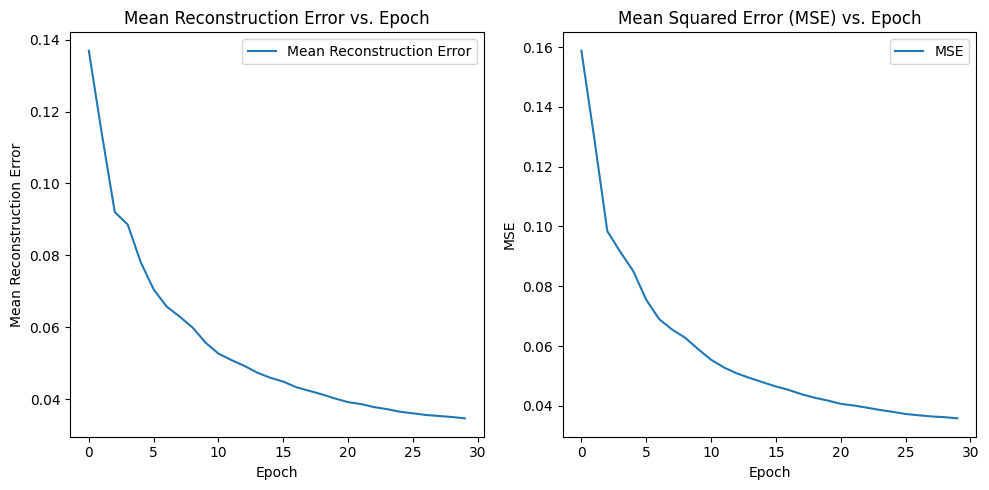

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(reconstruction_errors_per_epoch, label='Mean Reconstruction Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Reconstruction Error')
plt.title('Mean Reconstruction Error vs. Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mse_per_epoch, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
final_reconstruction_error = reconstruction_errors_per_epoch[-1]
final_mse = mse_per_epoch[-1]

print(f"Final Mean Reconstruction Error: {final_reconstruction_error:.4f}")
print(f"Final MSE: {final_mse:.4f}")

Final Mean Reconstruction Error: 0.0347
Final MSE: 0.0358


In [ ]:
# save the model
autoencoder.save("autoencoder_model.h5")

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
autoencoder = load_model("autoencoder_model.h5")

# 5. Make prediction and find outliers

### 5.1 Find the thredshold with training set

In [ ]:
# Make predictions
reconstructed_images = autoencoder.predict(X_train) # predict on training set

16/16 [==============================] - 10s 579ms/step


In [ ]:
# Calculate reconstruction errors
mse = np.mean(np.power(X_train - reconstructed_images, 2), axis=(1, 2, 3))

In [ ]:
# Set the threshold just above the maximum reconstruction error in training data
threshold = np.max(mse) + 0.0000000001  # Add a small epsilon to ensure it's above the max

In [ ]:
threshold

0.07487517605291137

In [ ]:
# Identify outliers
outliers = np.where(mse > threshold)[0]

print("===== Training set prediction =====")
print("Number of outliers:", len(outliers))
print("Outliers:", outliers)

===== Training set prediction =====
Number of outliers: 0
Outliers: []


### 5.2 Predict outliers in val_set to check if the treshold works

In [ ]:
# Make predictions
val_reconstructed_images = autoencoder.predict(X_val) # predict on val set

2/2 [==============================] - 1s 460ms/step


In [ ]:
# Calculate reconstruction errors
mse_val = np.mean(np.power(X_val - val_reconstructed_images, 2), axis=(1, 2, 3))

In [ ]:
# Identify outliers
outliers = np.where(mse_val > threshold)[0]
print("===== Validation set prediction =====")
print("Number of outliers:", len(outliers))
print("Outliers:", outliers)

===== Validation set prediction =====
Number of outliers: 4
Outliers: [ 7  9 44 50]


### 5.3 Predict test image

In [ ]:
test_data = pd.read_csv('../input/UBC-OCEAN/test.csv')
test_data

,image_id,image_width,image_height
0,41,28469,16987


In [ ]:
test_thumbnails_folder_path = '../input/UBC-OCEAN/test_thumbnails'
test_data['full_path'] = test_data['image_id'].apply(lambda x: os.path.join(test_thumbnails_folder_path, f"{x}_thumbnail.png"))

In [ ]:
x_test = np.empty(shape=(len(test_data), 600, 600, 3), dtype=np.uint8)

for index, full_path in enumerate(test_data['full_path']):
    image_array = Image.open(full_path).resize((600, 600)).convert('RGB')
    x_test[index] = image_array

print(x_test.shape)

(1, 600, 600, 3)


In [ ]:
# image augmentation
datagen.fit(x_test)

In [ ]:
# Normalize x
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Make predictions in test images
test_reconstructed_images = autoencoder.predict(x_test)

mse_test = np.mean(np.power(x_test - test_reconstructed_images, 2), axis=(1, 2, 3))

# Identify outliers
test_outliers = np.where(mse_test > threshold)[0]
print("Number of outliers among test images:", len(test_outliers))
print("Outliers:", test_outliers)

print('\nIs the single test image an outlier?')
if len(test_outliers) == 0:
    print("False")
else:
    print("True")

1/1 [==============================] - 0s 112ms/step
Number of outliers among test images: 0
Outliers: []

Is the single test image an outlier?
False
